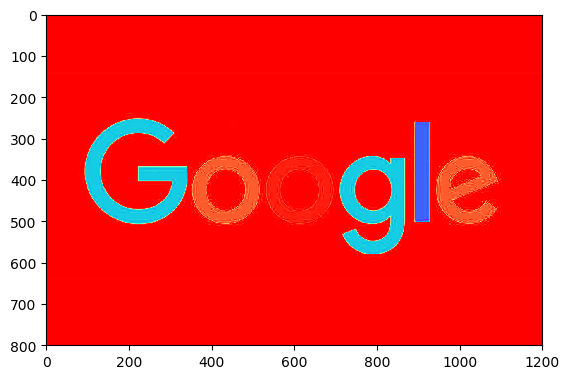

In [540]:
import matplotlib.pyplot as plt
import numpy as np 

jpg_img_arr = mpimg.imread('/Users/frhyme/Downloads/google2.0.0.jpg')
plt.imshow(jpg_img_arr[:, :, 0]/500/256, cmap=plt.cm.rainbow)

<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1.0


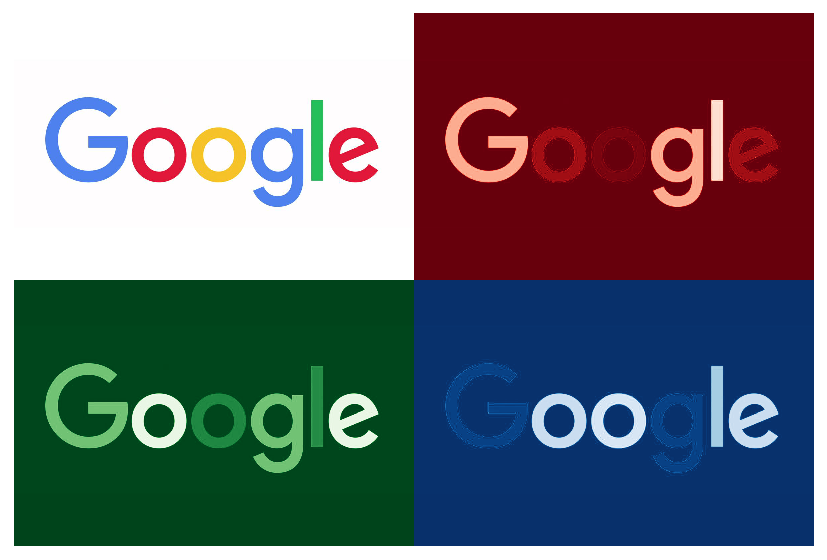

In [525]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# 샘플 그림을 그립시다. 
plt.style.use("default")
jpg_img_arr = mpimg.imread('/Users/frhyme/Downloads/google2.0.0.jpg')
jpg_IMG = Image.open('/Users/frhyme/Downloads/google2.0.0.jpg')
print(type(jpg_img_arr))# 얘는 np.array
print(type(jpg_IMG))# 얘는 PIL.JpegImagePlugin.JpegImageFile' 오브젝트
print((jpg_img_arr == np.array(jpg_IMG)).mean())# 다행히 np.array로 변환이 쉬움. 

height, width, layer = jpg_img_arr.shape

f, axes = plt.subplots(2, 2, figsize=(8, 8*height/width))
## original img plotting 
axes[0][0].imshow(jpg_img_arr[:, :, :]), axes[0][0].axis('off')
axes[0][0].set_xticks([]), axes[0][0].set_yticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
# Red, Green, Blue로 구분하여 표현. colormap 또한, 그 형식에 맞춰서 표현 
# 실제 그림을 보면 색깔별로 어느 정도 구분되어 있는 것을 알 수 있음. 
cmaps = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
for i in range(1, 4):
    axes[i//2][i%2].imshow(jpg_img_arr[:, :, i-1], cmap=cmaps[i-1])
    axes[i//2][i%2].set_xticks([]), axes[i//2][i%2].set_yticks([])# 이걸 하지 않으면 tick이 남아있어서 간격이 생김. 
    axes[i//2][i%2].axis('off')
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
## sutplots_adjust는 subplot 간에 간격을 붙이려고 쓴건데, 쓰고보니 어떻게 쓰는건지 모르겠음. 그냥 모르겠음...
plt.margins(0, 0, tight=False)
# pad_inches를 0으로 두고 저장하면, 공백없이 저장됨. 
plt.savefig("../../assets/images/markdown_img/180628_1935_google_rgb.svg", pad_inches=0)
plt.show()

In [263]:
# read svg

(480, 640, 4)


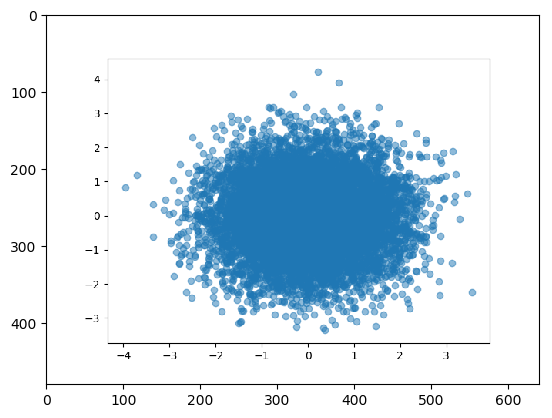

In [263]:
# Figure to np.array 
# https://matplotlib.org/gallery/misc/agg_buffer_to_array.html
import numpy as np 
import matplotlib.pyplot as plt 

def figure_to_array(fig):
    """
    plt.figure를 RGBA로 변환(layer가 4개)
    shape: height, width, layer
    """
    fig.canvas.draw()
    return np.array(fig.canvas.renderer._renderer)

f = plt.figure()
s = 10000
plt.scatter(np.random.normal(0, 1, s), np.random.normal(0, 1, s), alpha=0.5)
#plt.margins(0, 0, tight=False)
plt.close() # 쥬피터 노트북에 그림이 자동으로 뜨는 것을 막으려고 사용. 

f_arr = figure_to_array(f)
print(f_arr.shape) # 이 RGBA로 변환됨. 
plt.figure()
plt.imshow(f_arr[:, :, :])
#plt.margins(0, 0, tight=False)
plt.savefig('../../assets/images/markdown_img/180629_figure_to_nparray.svg')
#plt.show()

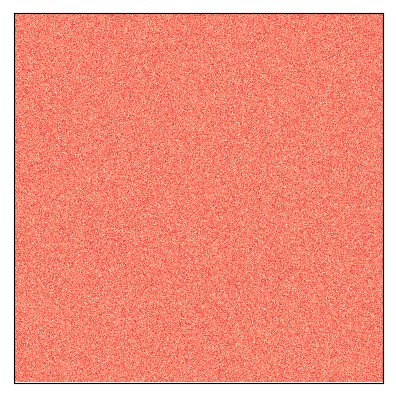

In [294]:
#cairosvg.svg2png(#url="/path/to/input.svg", write_to="/tmp/output.png")
import matplotlib.pyplot as plt
import cairosvg
import numpy as np 

w = 2048
a = np.random.normal(0, 1, w**2).reshape(w, w)
plt.imshow(a, cmap=plt.cm.Reds, alpha=0.8)
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig("../../assets/images/markdown_img/180629_1521_simple_svg.svg")
plt.show()

cairosvg.svg2png(url="../../assets/images/markdown_img/180629_1521_simple_svg.svg", 
                 write_to="../../assets/images/markdown_img/180629_1521_simple_png.png", 
                 dpi = 100
                )

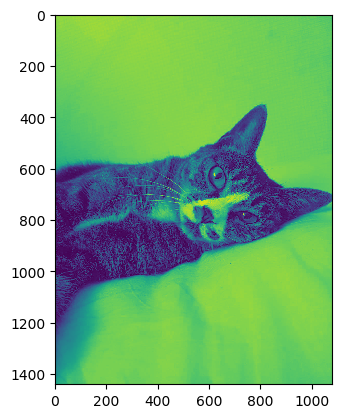

In [549]:
img = mpimg.imread('/Users/frhyme/Downloads/IMG_9715.JPG')

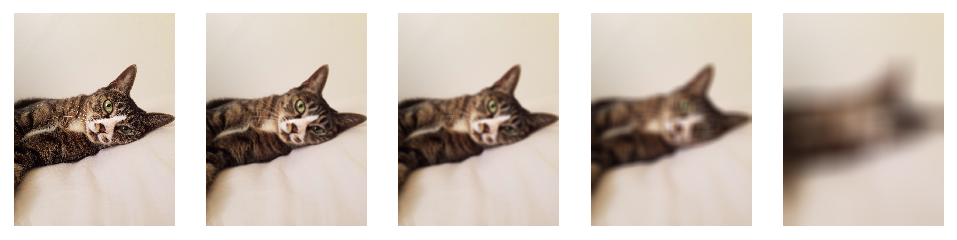

In [527]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("default")
img = mpimg.imread('/Users/frhyme/Downloads/IMG_9715.JPG')
#img = cv2.imread('/Users/frhyme/Downloads/') # cv2로 읽으면 칼라맵이 바뀌는 경우가 있는듯. 
height, width, layer = img.shape
# 어느 정도의 사이즈를 컨볼루션할 것인가를 결정하는 부분이다.
# 1일때는 큰 차이가 없고, 이 값이 커질수록, 뿌옇게 보이는 것을 알 수 있다. 
imgs = [cv2.blur(img, (i, i)) for i in [1, 10, 20, 50, 200]]
f, axes = plt.subplots(1, len(imgs), figsize=(12, 8))
for i in range(0, len(axes)):
    axes[i].imshow(imgs[i]), axes[i].axis('off')
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.savefig('../../assets/images/markdown_img/180630_1817_cat_blur.svg')
plt.show()

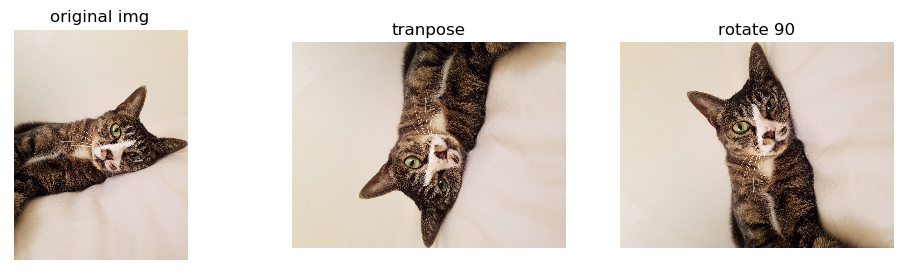

In [528]:
f, axes = plt.subplots(1, 3, figsize=(12, 3))
imgs = [img, img.transpose(1, 0, 2), np.rot90(img)]
titles = ['original img', 'tranpose', 'rotate 90']
for i, j in enumerate(imgs):
    axes[i].imshow(j)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    axes[i].axis('off'), axes[i].set_title(titles[i]), 
plt.savefig('../../assets/images/markdown_img/180630_1820_cat_transpose_rot.svg')
plt.show()

In [470]:
## make it gray scale 

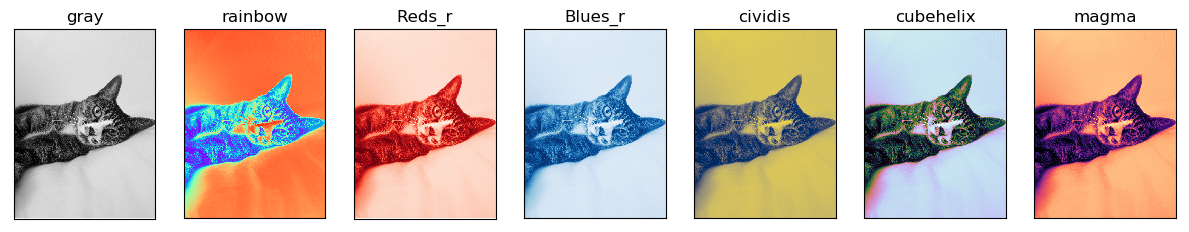

In [531]:
# 0.299 R + 0.587 G + 0.114 B, https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
from PIL import Image
import numpy as np 

img = Image.open('/Users/frhyme/Downloads/IMG_9715.JPG')
img_np = np.array(img)

img_np.transpose(2, 0, 1)
r = img_np.transpose(2, 0, 1)[0]
g = img_np.transpose(2, 0, 1)[1]
b = img_np.transpose(2, 0, 1)[2]
img_gray= r*0.299 + g*0.587 + b*0.114

cmaps = [plt.cm.gray, plt.cm.rainbow, plt.cm.Reds_r, plt.cm.Blues_r, plt.cm.cividis, plt.cm.cubehelix, plt.cm.magma]
f, axes = plt.subplots(1, len(cmaps), figsize=(15, 6))
for i in range(0, len(cmaps)):
    axes[i].imshow(img_gray, cmap=cmaps[i])
    axes[i].set_xticks([]), axes[i].set_yticks([]), axes[i].set_title(cmaps[i].name)
plt.savefig('../../assets/images/markdown_img/180630_1824_cat_gray_to_colormap.svg')
plt.show()

original img shape: (1440, 1080, 3)


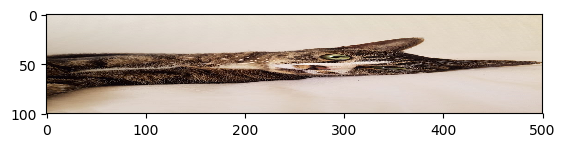

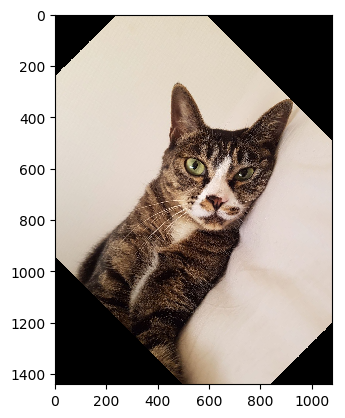

In [550]:
# simple transformation 
from PIL import Image

img = Image.open('/Users/frhyme/Downloads/IMG_9715.JPG')
print("original img shape: {}".format(np.array(img).shape))
# resize 
resized_img = np.array(img.resize((500, 100)))# width, height
plt.imshow(resized_img)
plt.savefig("../../assets/images/markdown_img/180630_1832_resized_cat.svg")
plt.figure()
# rotate
rotated_img = np.array(img.rotate(45))# width, height
plt.imshow(rotated_img)
plt.savefig("../../assets/images/markdown_img/180630_1832_rotated_cat.svg")


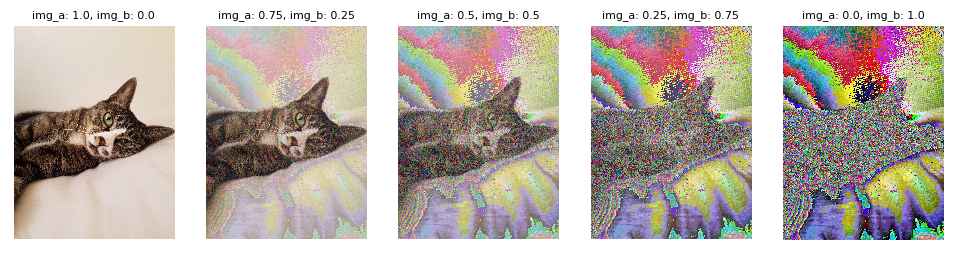

In [561]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 

img = Image.open('/Users/frhyme/Downloads/IMG_9715.JPG')
img_a, img_b = np.array(img), img_a*20
# 아래에서 image를 256으로 나누워주는 이유는, plt.imshow()의 한계때문인데
# 0-256 사이의 정수거나, 0-1사이의 float만 지원함. 
# 즉, 1이 넘는 float은 문제가 발생함. 
blend_rates = np.linspace(0, 1, 5)
#plt.imshow(img_blended)
f, axes = plt.subplots(1, len(blend_rates), figsize=(12, 12))
for i, r in enumerate(blend_rates):
    blended_img = (img_a*(1-r) + img_b*r)/256
    axes[i].imshow(blended_img), axes[i].axis('off')
    axes[i].set_xticks([]), axes[i].set_yticks([]), 
    axes[i].set_title("img_a: {}, img_b: {}".format(1-r, r), fontsize=8)
plt.savefig('../../assets/images/markdown_img/180630_1850_cat_blended.svg')
plt.show()


#cv2.addWeighted(img1,0.7,img2,0.3,0)

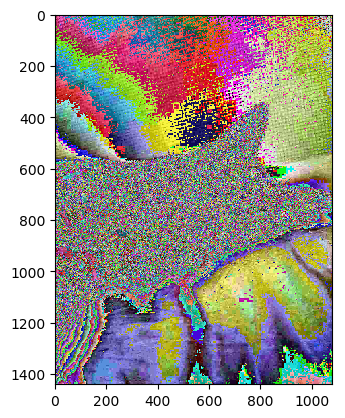

In [442]:
plt.imshow(img*20)

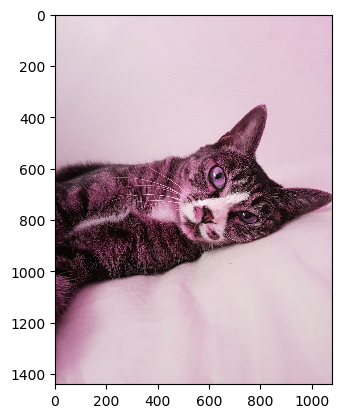

In [400]:
a = np.array([
    np.array([
        np.array([img[i][j][0], img[i][j][2], img[i][j][1]]) for j in range(0, img.shape[1])
    ]) for i in range(0, img.shape[0])
])
plt.imshow(a)

In [3]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # img read 
from IPython.display import HTML


def show_video_in_jupyter_nb(width, height, video_url):    
    return HTML("""<video width="{}" height="{}" controls>
    <source src={} type="video/mp4">
    </video>""".format(width, height, video_url))

def make_video(output_file_path):
    """
    - np.array로 넘기는 것은 문제가 없는데, np.array를 모두 0과 1사이의 float으로 변형해서 넘길 것 
    """
    ### read data 
    img1 = mpimg.imread("/Users/frhyme/Downloads/IMG_9715.JPG")
    img2 = img1*20
    img1, img2 = img1/256, img2/256
    height, width, layers = img1.shape
    ### make figure 
    fig, ax = plt.subplots(1, 1, figsize=(3, 4))
    ax.get_xaxis().set_visible(False), ax.get_yaxis().set_visible(False)
    plt.axis('off')
    im = ax.imshow(img1,interpolation='nearest')
    #plt.close()# 이미지 한장 뜨는걸 방지함. 
    ########################3
    ## update_img가 가장 중요함. 이 함수가 그림 그려지는 데이터를 조절해서 그림을 적당히 예쁘게 그려줌. 
    def update_img(f):#frame가 넘어옴
        tmp = img1 * f + img2* (1-f)
        im.set_data(tmp)# 데이터를 바꾸어주면서 그림을 그려야 함.
        return im
    """
    frames: If an integer, then equivalent to passing range(frames)
    interval: Delay between frames in milliseconds. Defaults to 200.
    """
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, func=update_img,
                                  frames=np.linspace(0, 1, 150),
                                  interval=500)
    ## ffmpeg가 깔려 있어야 할 수 있는데 brew install ffmpeg 를 사용하는 것이 좋음. 
    writer = animation.writers['ffmpeg'](fps=25)
    dpi = 256
    ani.save(output_file_path,writer=writer,dpi=dpi)
    return ani

video_url = '../../assets/images/markdown_img/180702_cat_blending.mp4'
#make_video(video_url)
#show_video_in_jupyter_nb(200, 300, video_url)

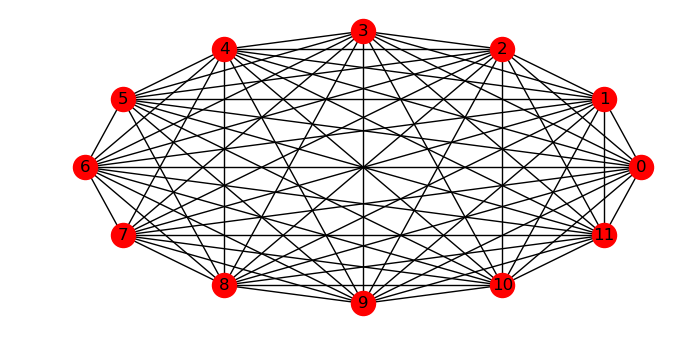

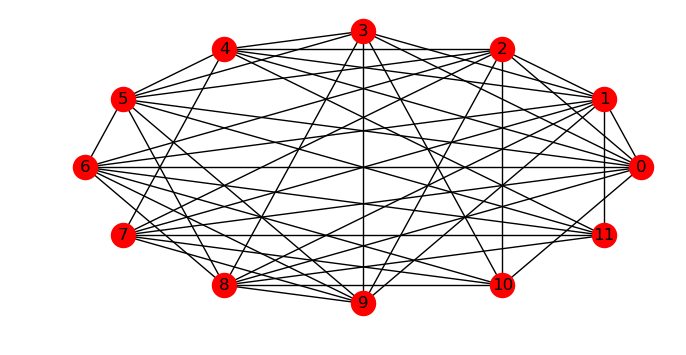

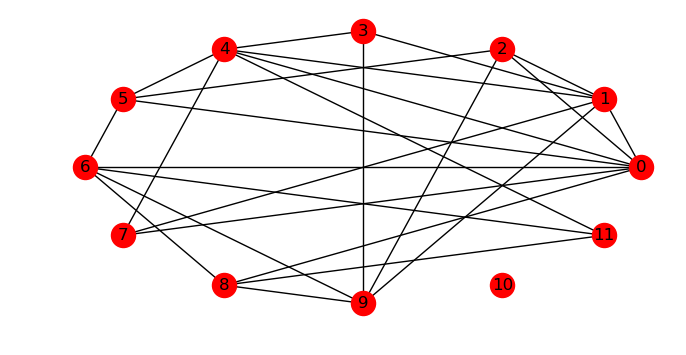

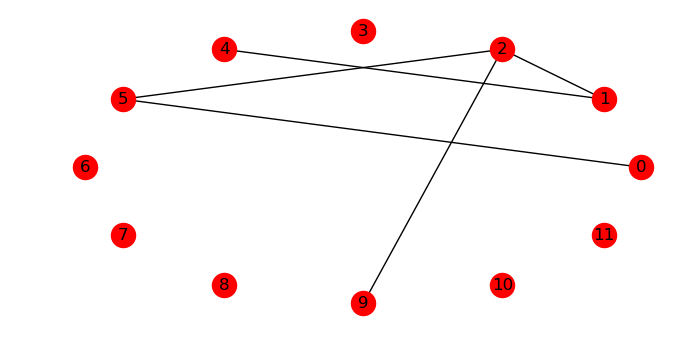

ValueError: a must be greater than 0

In [50]:
"""
간단하게 네트워크를 그리고, 네트워크가 변해가는 것을 볼 수는 없을까? 
"""

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 

plt.style.use('default')
G = nx.complete_graph(12)
#G.add_edges_from([ for i in range(0, 10)])

pos = nx.shell_layout(G)
for i in range(0, 100):
    n1, n2 = list(G.edges())[np.random.choice(len(G.edges()))]
    G.remove_edge(n1, n2)
    if i%20==0:
        plt.figure(figsize=(8, 4))
        nx.draw_networkx(G, pos)
        plt.axis('off')
        plt.show()


In [41]:
list(G.edges())[np.random.choice(len(G.edges()))]

(1, 3)